In [560]:
import pandas as pd
df = pd.read_csv('fct_invoice.csv')

print('EASY')
#number 1
print('1. NUMBER OF UNIQUE CUSTOMERS:', df['customer_id'].nunique())

#number 2
ctg = list(df['category'].unique())
print('2. CATEGORIES:', df['category'].nunique())
print(*ctg, sep = ', ')

#number 3
ranked_pm = dict(df['payment_method'].value_counts())
print('MOST POPULAR PAYMENT METHOD:',list(ranked_pm)[0])
print('TIMES USED:', ranked_pm['Cash'])

EASY
1. NUMBER OF UNIQUE CUSTOMERS: 5191
2. CATEGORIES: 8
Clothing, Shoes, Books, Cosmetics, Food & Beverage, Toys, Technology, Souvenir
MOST POPULAR PAYMENT METHOD: Cash
TIMES USED: 44447


MEDIUM
1. TOP THREE MOST POPULAR CATEGORY BY TOTAL SALES:
Clothing ,Shoes ,Technology
2. TOTAL SALES FROM CUSTOMERS OVER THE AGE OF 45: PHP 82039768.15
3.


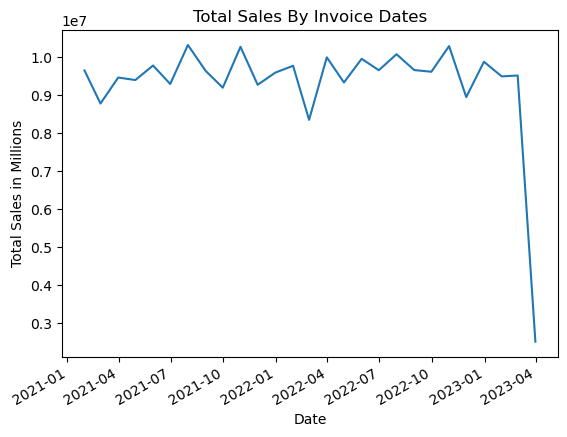

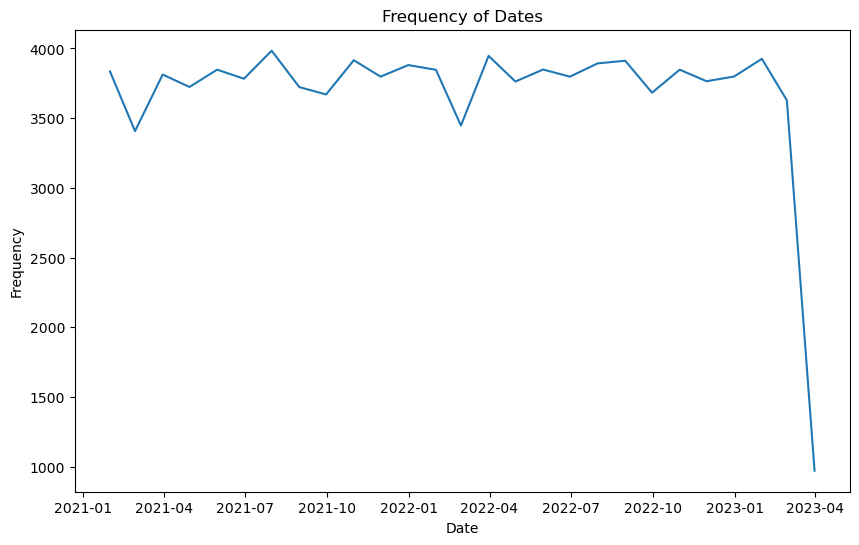

In [604]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
print('MEDIUM')

#number 1
df['total_sales'] = df['price'] * df['quantity']
ts_category=dict(df.groupby(['category']).sum(numeric_only=True).sort_values('total_sales', ascending=False))
ranked_ts_cat = dict(ts_category['total_sales'])
print('1. TOP THREE MOST POPULAR CATEGORY BY TOTAL SALES:')
print(*list(ranked_ts_cat)[:3], sep = ' ,')

#number 2
dc = pd.read_json('dim_customer.json')
sorted_info = dc.loc[(dc['age'] > 45)]
ts_age=pd.merge(df, sorted_info, how = 'inner', left_on='customer_id',right_on='id')
ts_age_merged = ts_age['total_sales'].sum()
print('2. TOTAL SALES FROM CUSTOMERS OVER THE AGE OF 45: PHP',np.round(ts_age_merged, 2))

#number 3
monthly_sales = df.groupby([pd.to_datetime(df['invoice_date'], format = '%d/%m/%Y')]).sum(numeric_only=True)['total_sales']
print('3.')
plt.plot(monthly_sales.resample('M').sum())
plt.xlabel('Date')
plt.ylabel('Total Sales in Millions')
plt.title('Total Sales By Invoice Dates')
#plt.ylim(2000000, 3000000)
plt.gcf().autofmt_xdate()

newdate = pd.to_datetime(df['invoice_date'], format = '%d/%m/%Y')
date_counts = newdate.value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(date_counts.resample('M').sum())
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Frequency of Dates')
plt.show()

If grouped by monthly sales, it is apparent that there are trends and patterns as seen in the graph. In the first quarter of every year, the sales plummets down while on the third and fourth quarter of the year, they record significantly higher total monthly sales. This can be seen through the two years worth of data. The drop at the end of the graph is due to the data being limited only up to March 8, 2023 thus its sales are not in the same magnitude as that of the previous months.

In [566]:
print('HARD')
df['age_range'] = (dc['age'] // 10 * 10).astype(str) + '-' + (dc['age'] // 10 * 10 + 9).astype(str)
pd.pivot_table( df, values='total_sales', index='category', columns='age_range', aggfunc=['sum','mean'], fill_value=0 )

HARD


sum                                              \
age_range        10.0-19.0  20.0-29.0  30.0-39.0  40.0-49.0  50.0-59.0   
category                                                                 
Books               136.35    4196.55    5257.05    6120.60    3014.85   
Clothing         110129.36  454021.04  628967.68  474426.48  593558.24   
Cosmetics         10612.26   32243.38   29722.46   34479.68   26347.68   
Food & Beverage    1501.01    4424.58    4241.53    4686.08    4220.61   
Shoes             90625.67  398512.88  344497.58  304286.19  382908.46   
Souvenir            328.44    2826.93    3894.36    2791.74    3859.17   
Technology         2100.00  286650.00  185850.00  278250.00  341250.00   
Toys               3548.16   20858.88   17561.60   13905.92   16737.28   

                                                                     mean  \
age_range        60.0-69.0  70.0-79.0  80.0-89.0     nan-nan    10.0-19.0   
category                                                                    
Books              4514.70    2408.85    1136.25    17407.35   136.350000   
Clothing         476827.12  376300.32  153040.80  2421345.52  3239.098824   
Cosmetics         40781.98   22241.02   13987.04   174838.00   624.250588   
Food & Beverage    4377.51    3394.27    1820.04    18843.69    83.389444   
Shoes            295283.64  229865.11  108630.77  1410999.67  7552.139167   
Souvenir           2381.19    2486.76    2228.70    15284.19    82.110000   
Technology       455700.00  232050.00  128100.00  1449000.00  1050.000000   
Toys              17274.88    8852.48    6702.08    77450.24   394.240000   

                                                                      \
age_range          20.0-29.0    30.0-39.0    40.0-49.0     50.0-59.0   
category                                                               
Books             190.752273   187.751786   185.472727    177.344118   
Clothing         2986.980526  3293.024503  2823.967143   3554.240958   
Cosmetics         441.690137   437.095000   430.996000    462.240000   
Food & Beverage    60.610685    55.084805    58.576000     54.813117   
Shoes            8132.915918  6151.742500  6209.922245   7224.687925   
Souvenir           91.191290   144.235556   126.897273    154.366800   
Technology       9884.482759  9781.578947  8975.806452  14218.750000   
Toys              443.805957   373.651064   347.648000    389.239070   

                                                                        
age_range           60.0-69.0     70.0-79.0    80.0-89.0       nan-nan  
category                                                                
Books              173.642308    185.296154   227.250000    169.003398  
Clothing          3056.584103   3516.825421  3060.816000   3381.767486  
Cosmetics          474.209070    436.098431   499.537143    477.699454  
Food & Beverage     67.346308     53.877302    50.556667     60.786097  
Shoes             7770.622105   5746.627750  8356.213077   6816.423527  
Souvenir           125.325789    138.153333   148.580000    127.368250  
Technology       15713.793103  11602.500000  9853.846154  12075.000000  
Toys               375.540870    340.480000   335.104000    361.917009